In [1]:
# import fireducks.pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fchali=pd.read_csv("D:/Arecanut-quality-classification/img-to-df/datasets-from-df.py/1stchali.csv")
gotu=pd.read_csv("D:/Arecanut-quality-classification/img-to-df/datasets-from-df.py/gotu.csv")
kole=pd.read_csv("D:/Arecanut-quality-classification/img-to-df/datasets-from-df.py/kole.csv")

In [4]:
print(fchali.info())
print(gotu.info())
print(kole.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 69.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 61.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 66.0+ MB
None


In [6]:
print(fchali.isnull().sum().any())
print(gotu.isnull().sum().any())
print(kole.isnull().sum().any())

False
False
False


In [9]:
print(fchali.shape)
print(gotu.shape)
print(kole.shape)

(559, 16386)
(495, 16386)
(528, 16386)


In [5]:
fchali=fchali.drop("image_name",axis=1)
gotu=gotu.drop("image_name",axis=1)
kole=kole.drop("image_name",axis=1)

In [6]:
fchali['grade'] = 1
gotu['grade'] = 2
kole['grade'] = 3

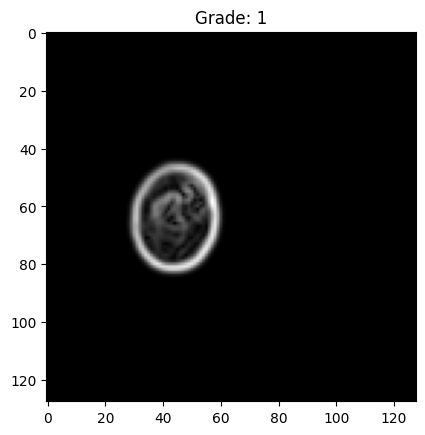

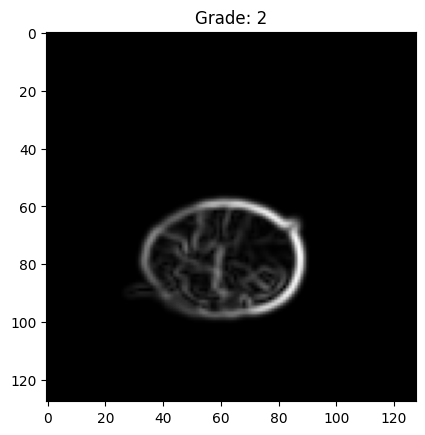

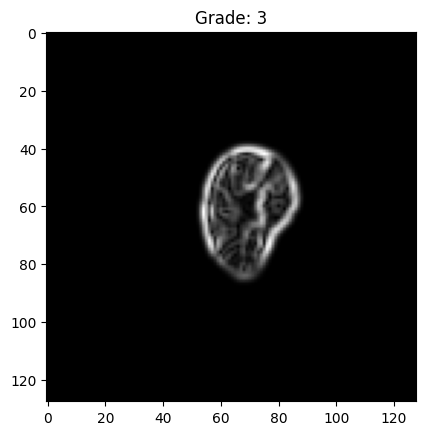

In [7]:
def display_image(df, index):
    image_data = df.iloc[index, :-2].values.reshape(128, 128)
    plt.imshow(image_data, cmap='gray')
    plt.title(f"Grade: {df.iloc[index, -1]}")
    plt.show()

display_image(fchali, 0)
display_image(gotu, 0)
display_image(kole, 0)

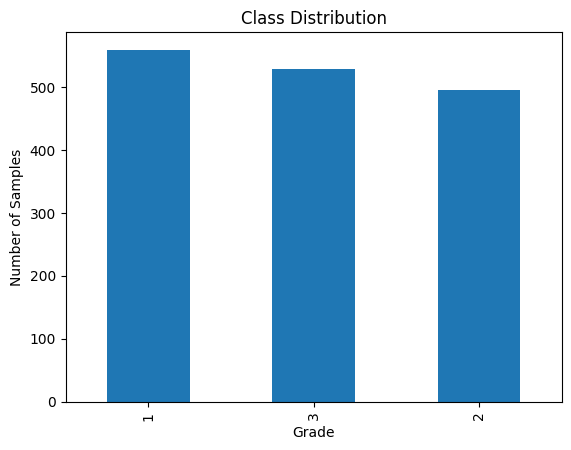

In [8]:
combined_df = pd.concat([fchali, gotu, kole])
combined_df['grade'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Samples')
plt.show()

In [9]:
# sns.histplot(combined_df[combined_df['grade'] == 1].iloc[:, :-2].values.flatten(), kde=True, color='blue', label='Grade 1')
# sns.histplot(combined_df[combined_df['grade'] == 2].iloc[:, :-2].values.flatten(), kde=True, color='green', label='Grade 2')
# sns.histplot(combined_df[combined_df['grade'] == 3].iloc[:, :-2].values.flatten(), kde=True, color='red', label='Grade 3')
# plt.legend()
# plt.title('Pixel Intensity Distributions by Grade')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.show()

# descriptive_stats = combined_df.iloc[:, :-2].describe()
# print(descriptive_stats)

In [10]:
# arecanut= pd.concat([fchali, gotu, kole], ignore_index=True)
# arecanut.sample(50)

In [11]:
arecanut.info()

NameError: name 'arecanut' is not defined

In [ ]:
# shuffled_arecanut = arecanut.sample(frac=1).reset_index(drop=True)
# shuffled_arecanut.head()

In [ ]:
# shuffled_arecanut.to_csv("arecanut.csv", index=False)

In [11]:
data=pd.read_csv("arecanut.csv")
data.head(30)

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384,grade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# arecanut.drop(columns=['filename'], inplace=True)

In [12]:
data.tail(30)

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384,grade
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [15]:

print(data['grade'].value_counts())

grade
1    559
3    528
2    495
Name: count, dtype: int64


In [18]:
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['grade'])
y = data['grade']

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['grade'] = y_resampled

resampled_data['grade'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_15252\2095097561.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_data['grade'] = y_resampled


grade
2    559
1    559
3    559
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(resampled_data.drop(columns=['grade']))

scaled_data_df = pd.DataFrame(scaled_data, columns=resampled_data.columns[:-1])

scaled_data_df['grade'] = resampled_data['grade'].values

scaled_data_df.head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384,grade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
from sklearn.model_selection import train_test_split

x= scaled_data_df.drop(columns=['grade'])
y = scaled_data_df['grade']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 1341
Test set size: 336


In [ ]:
# max_variance = 0.99  # Set the desired maximum variance
# min_components = 1  # Start with the minimum number of components

# for n in range(1, scaled_data.shape[1] + 1):
#     pca = PCA(n_components=n)
#     pca.fit(scaled_data)
#     cumulative_variance = pca.explained_variance_ratio_.cumsum()
#     if cumulative_variance[-1] >= max_variance:
#         min_components = n
#         break

# print(f"Minimum number of components required to explain {max_variance*100}% variance: {min_components}")

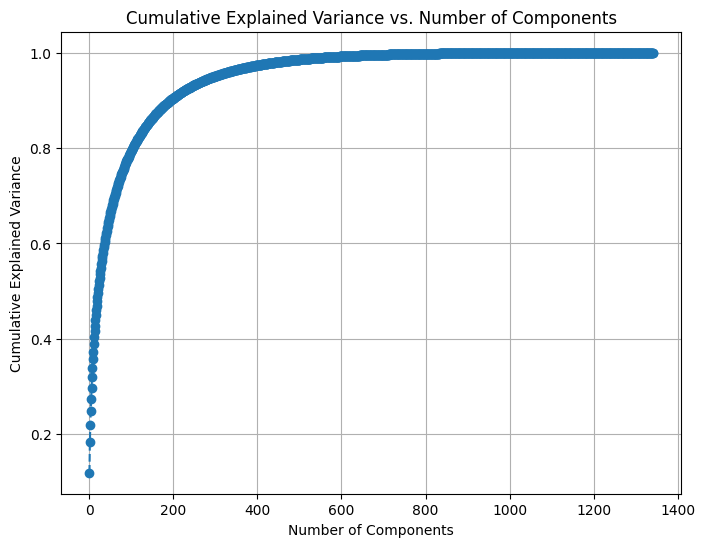

Number of components explaining 95% variance: 297


In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

n_components_95 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components_95}")

In [18]:
pca = PCA(n_components=n_components_95)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

print(f"Shape of X_train_pca: {x_train_pca.shape}")
print(f"Shape of X_test_pca: {x_test_pca.shape}")

Shape of X_train_pca: (1265, 318)
Shape of X_test_pca: (317, 318)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(x_train_pca, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(x_test_pca)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.668769716088328
Confusion Matrix:
[[70 16 25]
 [17 69  6]
 [37  4 73]]
Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.63      0.60       111
           2       0.78      0.75      0.76        92
           3       0.70      0.64      0.67       114

    accuracy                           0.67       317
   macro avg       0.68      0.67      0.68       317
weighted avg       0.68      0.67      0.67       317

